## Text Processing

### 1. load in data

In [1]:
#load in data
import pandas as pd
df = pd.read_csv(r'E:\WEMUST\Opensourcetools\final\terror2018.csv')

In [2]:
df.head()

,Unnamed: 0,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,182878,2018,1,1,Iraq,Middle East & North Africa,Tal Afar,36.376825,42.448876,Bombing/Explosion,3.0,0.0,Civilians,01/01/2018: An explosive device detonated in T...,Islamic State of Iraq and the Levant (ISIL),Private Citizens & Property,Explosives,NaN
1,182879,2018,1,1,Iraq,Middle East & North Africa,Kirkuk,35.452112,44.375464,Bombing/Explosion,0.0,0.0,Headquarters,01/01/2018: Assailants fired three mortars at ...,Unknown,Private Citizens & Property,Explosives,NaN
2,182880,2018,1,1,Pakistan,South Asia,Chaman,30.922110,66.451533,Bombing/Explosion,0.0,2.0,Under-Construction Building,01/01/2018: An explosive device detonated at a...,Unknown,Business,Explosives,NaN
3,182881,2018,1,1,Pakistan,South Asia,Chaman,30.922110,66.451533,Bombing/Explosion,0.0,6.0,Checkpost,01/01/2018: An explosive device detonated at a...,Unknown,Police,Explosives,NaN
4,182882,2018,1,1,Nigeria,Sub-Saharan Africa,Madagali,10.889420,13.628320,Bombing/Explosion,3.0,0.0,Civilians,01/01/2018: An explosive device detonated in M...,Boko Haram,Private Citizens & Property,Explosives,NaN


### 2. Convert all characters to lowercase with function str.lower()
By observing the raw text, replace \. with ' ' (sometimes '.' is linked to the next word without space, we deal with it here in order to simplify tokenization). What's more, the text is displayed in dataframe. use str.cat() function to convert them together.

In [3]:
#select Motive column for wordcloud display
#convert all characters to lowercase
#replace dot with space
#connect
#raw text
motive = df['Motive'].str.lower().str.replace('\.',' ').str.cat(sep = '')
#motive

C:\Users\SERGI\AppData\Local\Temp\ipykernel_16232\2710044425.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  motive = df['Motive'].str.lower().str.replace('\.',' ').str.cat(sep = '')


### 3. remove punctuations with regular expressions

In [4]:
import re
#remove punctuations
#r = "[0-9_.!+-=——,$%^，;。？、``~@#￥%……&*《》<>「」{}【】()/]"
new_word = re.sub(r'[^\w\s]', '', motive)
#new_word2 = new_word.replace(r'\B\'s\b', '')
#new_word

### 4. Tokenize the data using the word_tokenize() function in nltk package, which is a (...)

In [5]:
#tokenize the data
import nltk
word_token = nltk.word_tokenize(new_word)
#word_token

### 5. Remove 's and '' 

In [6]:
#remove 's
def remove_s(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'\'s', '',word)
        new_word = re.sub(r'``', '',word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

test2 = remove_s(word_token)
#len(test2)
#test2

### 6. remove stopwords from nltk package

In [7]:
#remove stopwords
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
#my_stopwords = set(stopwords.words('english'))
#stopword_list = ['s','e','t','n']
my_stopwords = set(STOPWORDS)  
#for i in stopword_list:
#   my_stopwords.add(i)
#my_stopwords
def remove_stopwords(words):
    new_words = []
    for word in words:
        if word not in my_stopwords:
            new_words.append(word)
    return new_words
test3 = remove_stopwords(test2)
#test3

In [8]:
#print(my_stopwords)

### 7. Lemmatization
Most of the Motives are written in past tense. We need to turn a word into its lemma using lemmatize() function.

In [9]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
lemmed = [WordNetLemmatizer().lemmatize(w) for w in test3]
pos_tags = nltk.pos_tag(lemmed)#词性划分
#pos_tags[:10]
lemmed

['specific',
 'motive',
 'unknown',
 'source',
 'suspected',
 'victim',
 'member',
 'coptic',
 'christian',
 'community',
 'may',
 'targeted',
 'part',
 'larger',
 'trend',
 'sectarian',
 'violence',
 'egypt',
 'majority',
 'muslim',
 'minority',
 'christian',
 'community',
 'fulani',
 'extremist',
 'claimed',
 'responsibility',
 'incident',
 'stated',
 'attack',
 'carried',
 'selfdefense',
 'fulani',
 'extremist',
 'claimed',
 'responsibility',
 'incident',
 'stated',
 'attack',
 'carried',
 'selfdefense',
 'fulani',
 'extremist',
 'claimed',
 'responsibility',
 'incident',
 'stated',
 'attack',
 'carried',
 'selfdefense',
 'specific',
 'motive',
 'unknown',
 'source',
 'posited',
 'assailant',
 'demanded',
 'afghan',
 'government',
 'conduct',
 'vaccination',
 'drive',
 'territory',
 'taliban',
 'control',
 'fulani',
 'extremist',
 'claimed',
 'responsibility',
 'incident',
 'stated',
 'attack',
 'carried',
 'selfdefense',
 'specific',
 'motive',
 'unknown',
 'source',
 'noted',
 'at

In [10]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [11]:
from nltk.corpus import wordnet
wnl = WordNetLemmatizer()
lemmas_sent = []
for tag in pos_tags:
    wordnet_pos = get_wordnet_pos(tag[1]) or wordnet.NOUN
    lemmas_sent.append(wnl.lemmatize(tag[0], pos=wordnet_pos)) # 词形还原
lemmas_sent

['specific',
 'motive',
 'unknown',
 'source',
 'suspect',
 'victim',
 'member',
 'coptic',
 'christian',
 'community',
 'may',
 'target',
 'part',
 'large',
 'trend',
 'sectarian',
 'violence',
 'egypt',
 'majority',
 'muslim',
 'minority',
 'christian',
 'community',
 'fulani',
 'extremist',
 'claim',
 'responsibility',
 'incident',
 'state',
 'attack',
 'carry',
 'selfdefense',
 'fulani',
 'extremist',
 'claim',
 'responsibility',
 'incident',
 'state',
 'attack',
 'carry',
 'selfdefense',
 'fulani',
 'extremist',
 'claim',
 'responsibility',
 'incident',
 'state',
 'attack',
 'carry',
 'selfdefense',
 'specific',
 'motive',
 'unknown',
 'source',
 'posit',
 'assailant',
 'demand',
 'afghan',
 'government',
 'conduct',
 'vaccination',
 'drive',
 'territory',
 'taliban',
 'control',
 'fulani',
 'extremist',
 'claim',
 'responsibility',
 'incident',
 'state',
 'attack',
 'carry',
 'selfdefense',
 'specific',
 'motive',
 'unknown',
 'source',
 'note',
 'attack',
 'occurred',
 'two',
 '

### 8. Use Counter() function to calculate the frequency
we can also use FreqDist in nltk package, as for this text data there are many composition (合成词) that contains '-'. 

In [12]:
from collections import Counter
result = Counter(lemmas_sent)
result2 = result
result2.most_common(20)

[('source', 3159),
 ('unknown', 3091),
 ('motive', 3034),
 ('specific', 3033),
 ('attack', 2448),
 ('state', 2092),
 ('note', 1626),
 ('incident', 1369),
 ('claim', 1262),
 ('responsibility', 1242),
 ('suspect', 948),
 ('victim', 843),
 ('carry', 832),
 ('target', 795),
 ('may', 698),
 ('election', 645),
 ('retaliation', 471),
 ('part', 403),
 ('group', 401),
 ('islamic', 401)]

### 9. remove news-related nouns and verbs subjectively in order to perform Wordcloud

In [13]:
stopword_list = ['s','e','n','t','claim','source','motive','unknown','specific','state','note','claime','may','incident']  
for i in stopword_list:
    my_stopwords.add(i)
#print(my_stopwords)
result3 = remove_stopwords(lemmas_sent)
#len(result3)
result_final = Counter(result3)
result_final.most_common(20)

[('attack', 2448),
 ('responsibility', 1242),
 ('suspect', 948),
 ('victim', 843),
 ('carry', 832),
 ('target', 795),
 ('election', 645),
 ('retaliation', 471),
 ('part', 403),
 ('group', 401),
 ('islamic', 401),
 ('member', 396),
 ('people', 334),
 ('schedule', 327),
 ('maoist', 319),
 ('large', 305),
 ('assailant', 303),
 ('violence', 293),
 ('demand', 293),
 ('trend', 292)]

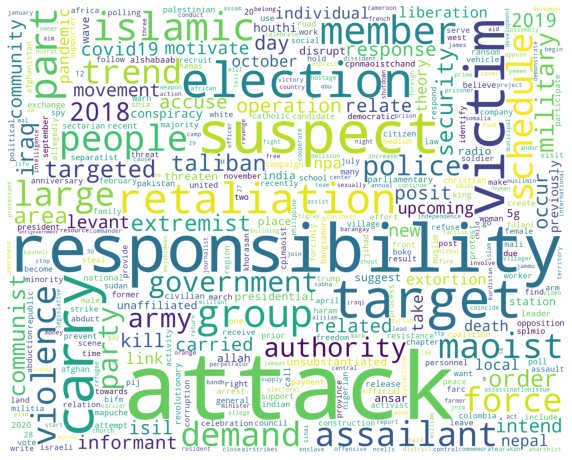

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
#word_dist = nltk.FreqDist(test3)
#my_stopwords_add = my_stopwords
#stopword_list = ['s','e','n','t','source','unknown','specific','state','note','claim','may']  
#for i in stopword_list:
  #  my_stopwords.add(i)

#Mask = np.array(Image.open('D:\myjupyter\opensource\cloud.jpg'))
wordcloud = WordCloud(stopwords=my_stopwords,background_color='white', max_words = 400,
                      width=2000,height=1600).generate_from_frequencies(result_final)
plt.imshow(wordcloud)
fig=plt.gcf()
fig.set_size_inches(10,16)
plt.axis('off')
plt.show(wordcloud)
#wordcloud.to_file('2018-2020final2.png')

In [15]:
#wordcloud.to_file('2018-2020final2.png')

In [16]:
#df['Group']
region_attacks = df.Group.value_counts().reset_index()
region = region_attacks.loc[1:10,:]
region.columns = ['Group','frequency']
region

,Group,frequency
1,Taliban,4502
2,Islamic State of Iraq and the Levant (ISIL),1577
3,Houthi extremists (Ansar Allah),1369
4,Al-Shabaab,1103
5,Boko Haram,888
6,New People's Army (NPA),623
7,Fulani extremists,585
8,Maoists,462
9,Separatists,336
10,Muslim extremists,285


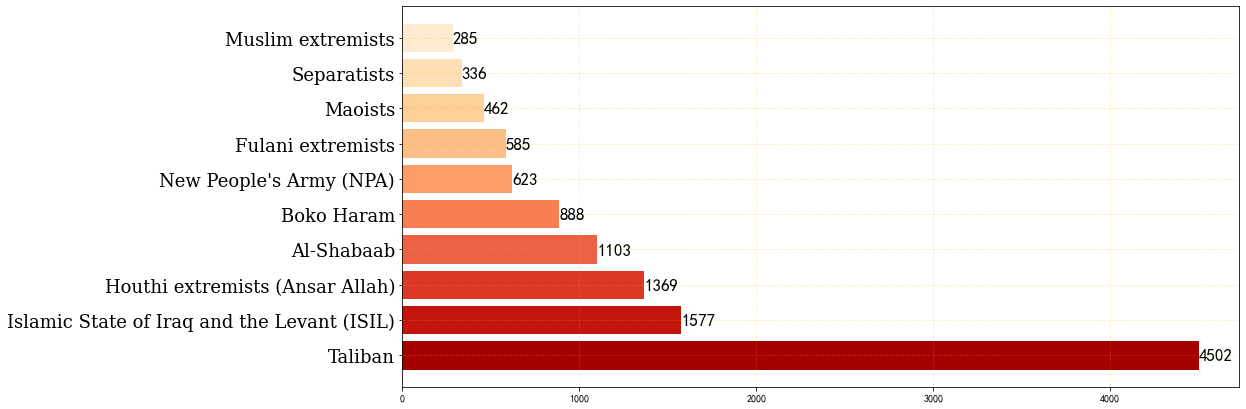

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
#use the groupby() function to separate the data by 'Country' and calculate the number of total casualities 
#with sum() function. use the sort_values() function to sort the values in descending order and reserve the top 10.

#rename name and number in list format
name = region.Group.tolist()
num = region.frequency.tolist()

###fig,ax = plt.subplots(figsize=(15,7))
#create a figure and define the color of the background
#fig = plt.figure(figsize = (15,7), edgecolor='white') 

#open the grid
#plt.grid(color='orange',linestyle='--',linewidth=1,alpha=0.2) 

#define the colors using palette from seaborn package
colors = sns.color_palette('OrRd_r',10)

#plot vertical barplot
#plt.barh(range(len(name)), num, color = colors,)
fig, ax = plt.subplots(figsize = (15,7), edgecolor='white')
b = ax.barh(range(len(name)), num, color=colors)
#open the grid
plt.grid(color='orange',linestyle='--',linewidth=1,alpha=0.2)

for rect in b:
    w = rect.get_width()
    ax.text(w, rect.get_y()+rect.get_height()/2, '%d' %
            int(w), ha='left', va='center',fontsize = 17)

#y label
ax.set_yticks(range(len(name)),fontsize = 16,fontproperties = 'serif')
ax.set_yticklabels(name,fontsize = 18,fontproperties = 'serif')

#define the style of x, y label and the title
#plt.xticks(rotation=30,fontsize = 18,fontproperties = 'serif')
#plt.yticks(fontsize =14,fontproperties = 'serif')
#plt.title('Number of Total Casualities in Each Country', size = 20, fontproperties = 'serif')

#label each bar in barplot. 
#x = a refers to x-coordinate position of data label, y = b refers to y-coordinate.
#s  = '%.0f' % b refers to the added data label, formatted to ignore decimals
#ha = 'center' sets horizontal alignment to center
#va = 'bottom', control the distance between label and the axis
#for a, b in zip(name, num):
 #   plt.text(a, b, '%.0f' % b, ha='center', va = 'bottom',fontsize=17)
plt.show()
fig.savefig('GroupCrime.png',bbox_inches = 'tight')